# __Laboratorio 3: Búsqueda informada (Parte 1)__

El siguiente taller de corresponde a la aplicación de algoritmos de búsqueda informada en la solución de problemas en inteligencia artificial. Para el desarrollo del laboratorio tenga en cuenta lo siguiente:

* La actividad puede realizarse en grupos de máximo 4 personas
* La solución al taller debe enviarse en un notebook a través de Moodle. Se debe adjuntar el archivo. No se aceptan enlaces
* El objetivo del taller es hacer énfasis en el proceso de modelamiento. Por esta razón se deben utilizar como base para la soluciones propuestas las clases y métodos disponibles en la sección recursos. __Otras implementaciones no serán tenidas en cuenta__.
* Si se detecta cualquier tipo de fraude, la calificación de 0.0.
* El taller deberá ser sustentando por uno de los miembros del grupo
* Las soluciones propuestas deben cumplir con las recomendaciones de código limpio especificadas en el [PEP8](https://pep8.org/), de lo contrario será penalizado

## __0. Recursos__

La clase abstracta `SearchProblem` servirá como una plantilla general para el proceso de formulación del problema como un problema de búsqueda. Cualquier implementación deberá heredar de esta clase

In [ ]:
%reset -f
import matplotlib
import matplotlib.pyplot as plt
import numpy as np


global estados_visitados
estados_visitados=list()

class SearchProblem(object):
    """The abstract class for a formal problem. A new domain subclasses this,
    overriding `actions` and `results`, and perhaps other methods.
    The default heuristic is 0 and the default action cost is 1 for all states.
    When you create an instance of a subclass, specify `initial`, and `goal` states 
    (or give an `is_goal` method) and perhaps other keyword args for the subclass."""

    def __init__(self, initial, goal=None, **kwds): 
        """The constructor specifies the initial state, and possibly a goal
        state, if there is a unique goal. Your subclass's constructor can add
        other arguments."""
        self.initial = initial
        self.goal = goal

        
    def actions(self, node):
        """Return the actions that can be executed in the given
        state. The result would typically be a list, but if there are
        many actions, consider yielding them one at a time in an
        iterator, rather than building them all at once."""        
        raise NotImplementedError
        
    def result(self, node, action): 
        """Return the state that results from executing the given
        action in the given state. The action must be one of
        self.actions(state)."""
        raise NotImplementedError
        
    def is_goal(self, node): 
        """Return True if the state is a goal. The default method compares the
        state to self.goal or checks for state in self.goal if it is a
        list, as specified in the constructor. Override this method if
        checking against a single self.goal is not enough."""      
        return self.goal == node
    
    def action_cost(self, s, a, s1): 
        """Return the cost of a solution path that arrives at state s1 from
        state s via action a. If the problem
        is such that the path doesn't matter, this function will only look at
        state s1.  If the path does matter, it will consider state s1
        and action a. The default method costs 1 for every step in the path."""
        return 1

    def h(self, node):
     raise NotImplementedError 
     
    def g(self, node):
     return node.path_cost()

    def f(self, node):
     return self.g(node) + self.h(node)  

También es posible implementar la clase abstracta `Node` para representar los posibles estados del problemas.

In [ ]:
class Node:
    def __init__(self, state='', parent=None, action=None, cost=1):
        self.state = state
        self.parent = parent
        self.action = action

    def states_path(self):
        if self.parent == None:
            return [self]
        return self.parent.states_path() + [self]
    
    def actions_path(self):
        if self.parent == None:
            return []
        return self.parent.actions_path() + [self.action]        

    def __eq__(self, node):
        if node:
            return self.state == node.state
        return False    

    def path_cost(self):
        total_cost = 0
        if self.parent is None:
            return total_cost
        total_cost += self.cost + self.parent.path_cost()
        return total_cost 

    def __repr__(self):
        return self.state  

## __Estructuras de datos - Cola de prioridad__

In [ ]:
import heapq
class PriorityQueue:
    """
      Implements a priority queue data structure. Each inserted item
      has a priority associated with it and the client is usually interested
      in quick retrieval of the lowest-priority item in the queue. This
      data structure allows O(1) access to the lowest-priority item.
    """
    def  __init__(self):
        self.heap = []
        self.count = 0

    def push(self, item, priority):
        entry = (priority, self.count, item)
        heapq.heappush(self.heap, entry)
        self.count += 1

    def pop(self):
        (_, _, item) = heapq.heappop(self.heap)
        return item

    def isEmpty(self):
        return len(self.heap) == 0

    def update(self, item, priority):
        # If item already in priority queue with higher priority, update its priority and rebuild the heap.
        # If item already in priority queue with equal or lower priority, do nothing.
        # If item not in priority queue, do the same thing as self.push.
        for index, (p, c, i) in enumerate(self.heap):
            if i == item:
                if p <= priority:
                    break
                del self.heap[index]
                self.heap.append((priority, c, item))
                heapq.heapify(self.heap)
                break
        else:
            self.push(item, priority)    

In [ ]:
def expand(problem, node):
    childs = []
    for action in problem.actions(node):
        childs.append(problem.result(node, action))
    return childs    

def UCS(problem, fringe=PriorityQueue()):
    closed = []
    fringe.push(problem.initial, 0)

    while(True):
        node = fringe.pop()
        if problem.is_goal(node): 
            return node
        if node not in closed: 
            closed.append(node)
            for child in expand(problem, node):
                fringe.push(child, problem.g(child))
def VORAZ(problem, fringe=PriorityQueue()):
    closed = []
    fringe.push(problem.initial, 0)

    while(True):
        node = fringe.pop()
        if problem.is_goal(node): 
            return node
        if node not in closed: 
            closed.append(node)
            for child in expand(problem, node):
                fringe.push(child, problem.h(child))
def A(problem, fringe=PriorityQueue()):
    closed = []
    fringe.push(problem.initial, 0)

    while(True):
        node = fringe.pop()
        if problem.is_goal(node): 
            return node
        if node not in closed: 
            closed.append(node)
            for child in expand(problem, node):
                fringe.push(child, problem.f(child))

##  __1. (2.0 puntos) Un grafo simple__

Genere un grafo de búsqueda con al menos 6 nodos especificando los costos de cada movimiento. A partir de este proponga:
* Una heurística no admisible
* Una heurística admisible pero no consistente
* Una heurística consistente

Encuentre la solución utilizando los algoritmos de A* y voraz para cada una de las 3 heurísicas propuestas. Analice los resultados obtenidos y explique si coinciden con la teoría.

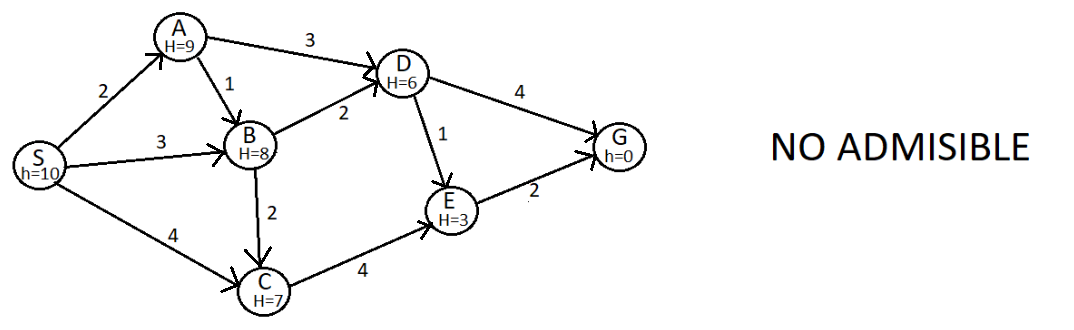

In [ ]:
# Solución propues
class NoAdmisible(SearchProblem):
  'Simple Graph as a search problem'

  def actions(self, node):
    moves = {
        'S':['move-A','move-B','move-C'],
        'A':['move-B','move-D'],
        'B':['move-D','move-C'],
        'C':['move-E'],
        'D':['move-E','move-G'],
        'E':['move-G']}
    return moves[node.state]        

  def result(self, node, action):
    new_state = {
            'move-A': 'A',
            'move-B': 'B',
            'move-C': 'C',
            'move-D': 'D',
            'move-E': 'E',
            'move-G': 'G',
            'move-S': 'S'
    }      
    new_node = Node(new_state[action], node, action)
    new_cost = self.action_cost(node,action,new_node)
    new_node.cost = new_cost
    return new_node 

  def action_cost(self, node, action, succesor):
    cost = {
        ('S', 'A'): 2,
        ('S', 'B'): 3,
        ('S', 'C'): 4,
        ('A', 'B'): 1,
        ('A', 'D'): 3,
        ('B', 'C'): 2,
        ('B', 'D'): 2,
        ('C', 'E'): 4,
        ('D', 'E'): 1,
        ('D', 'G'): 4,
        ('E', 'G'): 2}
    return cost[(node.state, succesor.state)]

  def h(self, node):
    heuristic = {
        'S':10,
        'A':9,
        'D':6,
        'B':8,
        'C':7,
        'E':3,
        'G':0}
    return heuristic[node.state]  

In [ ]:
NoAd = NoAdmisible(Node('S'), Node('G'))
print('No Admisible \n')
print('Voraz:')
solution = VORAZ(NoAd)
print('Action sequence:', solution.actions_path())
print('State sequence:', solution.states_path())
print('Heuristica:', NoAd.h(solution))
print('')

NoAd = NoAdmisible(Node('S'), Node('G'))
print('A*')
solution = A(NoAd)
print('Action sequence:', solution.actions_path())
print('State sequence:', solution.states_path())
print('Cost:', NoAd.g(solution))
print('Heuristica:', NoAd.h(solution))
print('f:', NoAd.f(solution))

No Admisible 

Voraz:
Action sequence: ['move-C', 'move-E', 'move-G']
State sequence: [S, C, E, G]
Heuristica: 0

A*
Action sequence: ['move-A', 'move-D', 'move-E', 'move-G']
State sequence: [S, A, D, E, G]
Cost: 8
Heuristica: 0
f: 8


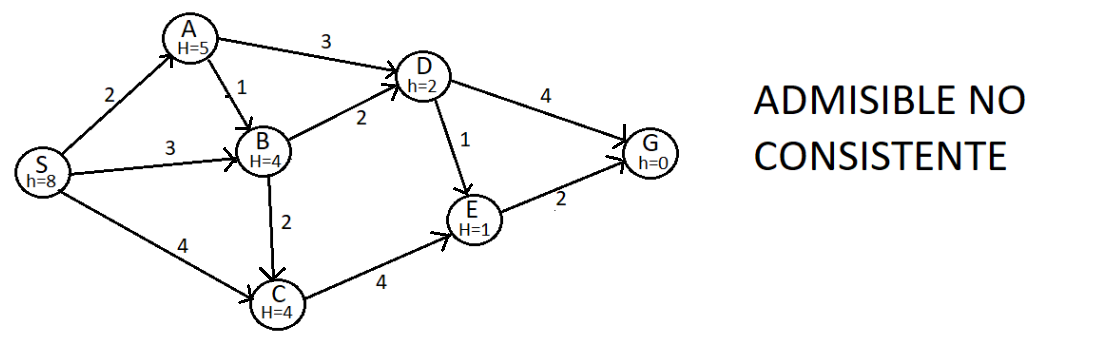

In [ ]:
class AdmisibleNoConsitente(SearchProblem):
  'Simple Graph as a search problem'

  def actions(self, node):
    moves = {
        'S':['move-A','move-B','move-C'],
        'A':['move-B','move-D'],
        'B':['move-D','move-C'],
        'C':['move-E'],
        'D':['move-E','move-G'],
        'E':['move-G']}
    return moves[node.state]        

  def result(self, node, action):
    new_state = {
            'move-A': 'A',
            'move-B': 'B',
            'move-C': 'C',
            'move-D': 'D',
            'move-E': 'E',
            'move-G': 'G',
            'move-S': 'S'
    }      
    new_node = Node(new_state[action], node, action)
    new_cost = self.action_cost(node,action,new_node)
    new_node.cost = new_cost
    return new_node 

  def action_cost(self, node, action, succesor):
    cost = {
        ('S', 'A'): 2,
        ('S', 'B'): 3,
        ('S', 'C'): 4,
        ('A', 'B'): 1,
        ('A', 'D'): 3,
        ('B', 'C'): 2,
        ('B', 'D'): 2,
        ('C', 'E'): 4,
        ('D', 'E'): 1,
        ('D', 'G'): 4,
        ('E', 'G'): 2}
    return cost[(node.state, succesor.state)]

  def h(self, node):
    heuristic = {
        'S':8,
        'A':5,
        'D':2,
        'B':4,
        'C':4,
        'E':1,
        'G':0}
    return heuristic[node.state]

In [ ]:
AdNoCo = AdmisibleNoConsitente(Node('S'), Node('G'))
print('Admisible NO Consistente\n')
print('Voraz:')
solution = VORAZ(AdNoCo)
print('Action sequence:', solution.actions_path())
print('State sequence:', solution.states_path())
print('Heuristica:', AdNoCo.h(solution))
print('')

AdNoCo = AdmisibleNoConsitente(Node('S'), Node('G'))
print('A*')
solution = A(AdNoCo)
print('Action sequence:', solution.actions_path())
print('State sequence:', solution.states_path())
print('Cost:', AdNoCo.g(solution))
print('Heuristica:', AdNoCo.h(solution))
print('f:', AdNoCo.f(solution))

Admisible NO Consistente

Voraz:
Action sequence: ['move-B', 'move-D', 'move-G']
State sequence: [S, B, D, G]
Heuristica: 0

A*
Action sequence: ['move-A', 'move-D', 'move-E', 'move-G']
State sequence: [S, A, D, E, G]
Cost: 8
Heuristica: 0
f: 8


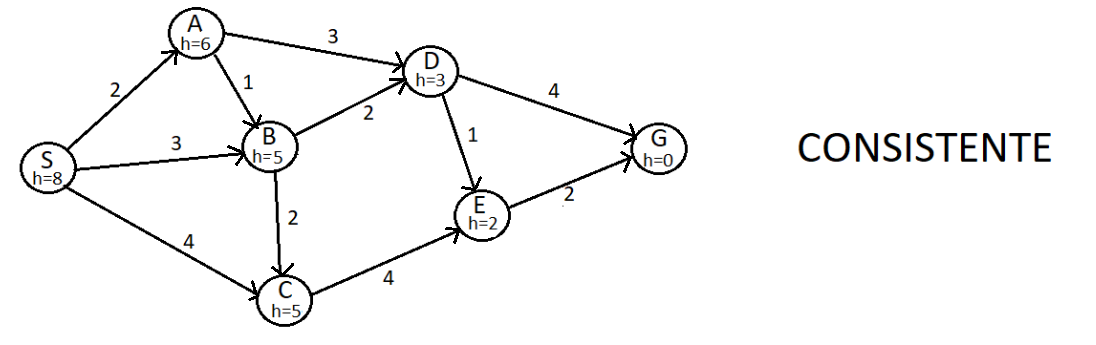

In [ ]:
class Consitente(SearchProblem):
  'Simple Graph as a search problem'

  def actions(self, node):
    moves = {
        'S':['move-A', 'move-B','move-C'],
        'A':['move-B', 'move-D'],
        'B':['move-D','move-C'],
        'C':['move-E'],
        'D':['move-E','move-G'],
        'E':['move-G']}
    return moves[node.state]        

  def result(self, node, action):
    new_state = {
            'move-A': 'A',
            'move-B': 'B',
            'move-C': 'C',
            'move-D': 'D',
            'move-E': 'E',
            'move-G': 'G',
            'move-S': 'S'
    }      
    new_node = Node(new_state[action], node, action)
    new_cost = self.action_cost(node,action,new_node)
    new_node.cost = new_cost
    return new_node 

  def action_cost(self, node, action, succesor):
    cost = {
        ('S', 'A'): 2,
        ('S', 'B'): 3,
        ('S', 'C'): 4,
        ('A', 'B'): 1,
        ('A', 'D'): 3,
        ('B', 'C'): 2,
        ('B', 'D'): 2,
        ('C', 'E'): 4,
        ('D', 'E'): 1,
        ('D', 'G'): 4,
        ('E', 'G'): 2}
    return cost[(node.state, succesor.state)]

  def h(self, node):
    heuristic = {
        'S':8,
        'A':6,
        'D':3,
        'B':5,
        'C':5,
        'E':2,
        'G':0}
    return heuristic[node.state] 

In [ ]:
Cons = Consitente(Node('S'), Node('G'))
print('Consistente \n')
print('Voraz:')
solution = VORAZ(Cons)
print('Action sequence:', solution.actions_path())
print('State sequence:', solution.states_path())
print('Heuristica:', Cons.h(solution))
print('')

Cons = Consitente(Node('S'), Node('G'))
print('A*')
solution = A(Cons)
print('Action sequence:', solution.actions_path())
print('State sequence:', solution.states_path())
print('Cost:', Cons.g(solution))
print('Heuristica:', Cons.h(solution))
print('f:', Cons.f(solution))

Consistente 

Voraz:
Action sequence: ['move-B', 'move-D', 'move-E', 'move-G']
State sequence: [S, B, D, E, G]
Heuristica: 0

A*
Action sequence: ['move-A', 'move-D', 'move-E', 'move-G']
State sequence: [S, A, D, E, G]
Cost: 8
Heuristica: 0
f: 8


# RESULTADOS VORAZ Y A* **texto en negrita**

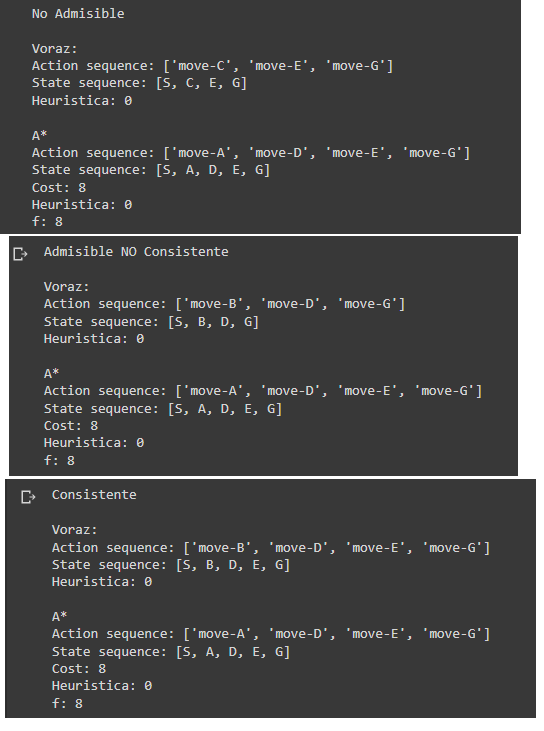

Primeramente observaremos los resultados de la búsqueda Voraz.


*   No Admisible........................Sequence (S,C,E,G) ....... COST=10
*   Admisible no Consistente...Sequence(S,B,D,G) ........ COST=9
*   Consistente...........................Sequence(S,B,D,E,G) .... COST=8

El mejor resultado entre los tres casos y, de hecho, un resultado óptimo lo entrega el caso de heurística Consistente con un costo de 8. Esto es debido a que este caso no sobrestima el costo entre los diferentes movimientos, por lo que implicitamente Voraz tendrá en cuenta la ruta óptima. En cambio, en No admisible y en Admisible no consistente no existe una relación tan estrecha entre la heurística y el costo de cada nodo, por lo cual la búsqueda solo será guiada por la pobre heurística.

En el segundo caso se observa los resultados de A*

*   No Admisible........................Sequence (S,A,D,E,G) ....... COST=8
*   Admisible no Consistente...Sequence(S,A,D,E,G) ........ COST=8
*   Consistente...........................Sequence(S,A,D,E,G) ........ COST=8

Sobra decir que cada uno de los casos presentará la solución óptima debido a que se trata de A*. Aquí la diferencia se encuentra en la cantidad de nodos expandidos, y por tanto, en el tiempo y costo computacional para encontrar la solución óptima, y es que una heurística consistente permite a la búsqueda permite tener una buena relación entre el costo y la heurística que no lo sobrestima, por lo que se incrementa la probabilidad de elegir el camino óptimo en un menor numero de intentos.



Asigne valores negativos a los valores de la heurísitca e intente encontrar la solución utilizando los algoritmos de A* y Voraz. ¿Qué ocurre?

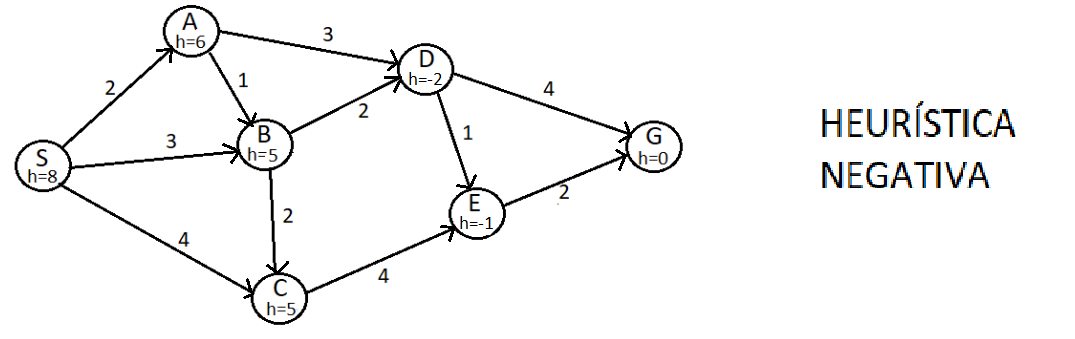

In [ ]:
# Solución propuesta
class NegativeHeuristic(SearchProblem):
  'Simple Graph as a search problem'

  def actions(self, node):
    moves = {
        'S':['move-A', 'move-B','move-C'],
        'A':['move-B', 'move-D'],
        'B':['move-D','move-C'],
        'C':['move-E'],
        'D':['move-E','move-G'],
        'E':['move-G']}
    return moves[node.state]        

  def result(self, node, action):
    new_state = {
            'move-A': 'A',
            'move-B': 'B',
            'move-C': 'C',
            'move-D': 'D',
            'move-E': 'E',
            'move-G': 'G',
            'move-S': 'S'
    }      
    new_node = Node(new_state[action], node, action)
    new_cost = self.action_cost(node,action,new_node)
    new_node.cost = new_cost
    return new_node 

  def action_cost(self, node, action, succesor):
    cost = {
        ('S', 'A'): 2,
        ('S', 'B'): 3,
        ('S', 'C'): 4,
        ('A', 'B'): 1,
        ('A', 'D'): 3,
        ('B', 'C'): 2,
        ('B', 'D'): 2,
        ('C', 'E'): 4,
        ('D', 'E'): 1,
        ('D', 'G'): 4,
        ('E', 'G'): 2}
    return cost[(node.state, succesor.state)]

  def h(self, node):
    heuristic = {
        'S':8,
        'A':6,
        'D':-2,
        'B':5,
        'C':5,
        'E':-1,
        'G':0}
    return heuristic[node.state]

In [ ]:
Neg = NegativeHeuristic(Node('S'), Node('G'))
print('Heurística Negativa \n')
print('Voraz:')
solution = VORAZ(Neg)
print('Action sequence:', solution.actions_path())
print('State sequence:', solution.states_path())
print('Heuristica:', Neg.h(solution))
print('')

Neg = NegativeHeuristic(Node('S'), Node('G'))
print('A*')
solution = A(Neg)
print('Action sequence:', solution.actions_path())
print('State sequence:', solution.states_path())
print('Cost:', Neg.g(solution))
print('Heuristica:', Neg.h(solution))
print('f:', Neg.f(solution))

Heurística Negativa 

Voraz:
Action sequence: ['move-C', 'move-E', 'move-G']
State sequence: [S, C, E, G]
Heuristica: 0

A*
Action sequence: ['move-A', 'move-D', 'move-E', 'move-G']
State sequence: [S, A, D, E, G]
Cost: 8
Heuristica: 0
f: 8


# HEURÍSTICA NEGATIVA

Debido a la construcción del código de búsqueda Voraz y A* se tiene un estado inicial que es el nodo del que se parte y un nodo final, el cual está dado por una heurística igual a 0. Esto se observa en la siguiente linea de código.

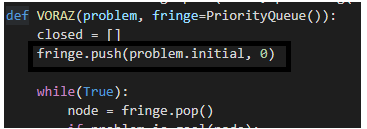

Teniendo así que el nodo objetivo no se verá afectado.
Por otro lado, la desición de que nodo expandir si se verá afectada, observando que en el caso de voraz siempre se elegirá primero la heúristica igual a 0 para llegar al objetivo, ó, la heurística menor, siendo estas las negativas. 

Para el caso de A* pasa algo similar, y es que una heurística negativa no sumará al costo del nodo, si no que le restará, teniendo una descompensación en la manera en que expande A*


## __2. (3.0 puntos) Un rompecabezas para niños__

El siguiente rompecabezas es un juego para niños en el cual las piezas solo pueden unirse en línea recta cambiándolas de lugar a través de tres operaciones permitidas por el juego. El objetivo es lograr una configuración como la que se presenta a continuación:

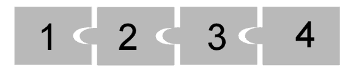

Las operaciones permitidas son:

* __D__: intercambiar dos piezas a la derecha
* __C__: intercambiar dos piezas en el centro
* __I__: intercambiar dos piezas en la izquierda

Por ejemplo, para el estado `[3|1|2|4]` tendríamos el siguiente árbol:

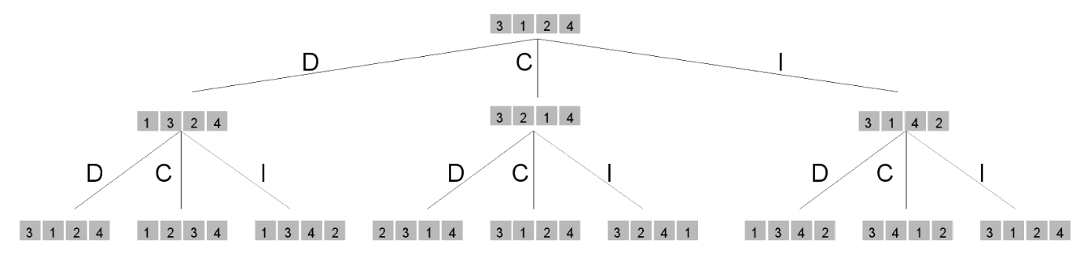

Con el ánimo de hacer el juego más interesante usted decide cambiar el costo de cada movimiento y propone las siguientes reglas: si la suma de los dos números en las fichas que desea mover es impar, el movimiento constará 2 puntos; si es par, constará 1 punto. El objetivo es completar el juego con la menor cantidad de puntos posibles. Encuentre la solución para este problema utilizando los algoritmos de UCS, Voraz y A* para el estado inicial `[3|4|2|1]`. Note que para implementar Voraz y A* es necesario proponer una heurística admisible.

In [ ]:
class Rompecabezas(SearchProblem):
  'Simple Graph as a search problem'

  def actions(self, node):
    
    frontera=list()
    #movimientos
    listaD=list()
    listaC=list()
    listaI=list()

    lista=node.state.split(',')

    res=1
    if lista not in estados_visitados:
          estados_visitados.append(lista)
    else:
      res=0

    
    if(res==1):
      #Primer Movimiento: D
      listaD.append(lista[1])
      listaD.append(lista[0])
      listaD.append(lista[2])
      listaD.append(lista[3])
      #Segundo Movimiento: C
      listaC.append(lista[0])
      listaC.append(lista[2])
      listaC.append(lista[1])
      listaC.append(lista[3])
      #Tercer Movimiento: I
      listaI.append(lista[0])
      listaI.append(lista[1])
      listaI.append(lista[3])
      listaI.append(lista[2])

      dataD='move-'+str(listaD[0])+','+str(listaD[1])+','+str(listaD[2])+','+str(listaD[3])
      dataC='move-'+str(listaC[0])+','+str(listaC[1])+','+str(listaC[2])+','+str(listaC[3])
      dataI='move-'+str(listaI[0])+','+str(listaI[1])+','+str(listaI[2])+','+str(listaI[3])

      frontera.append(dataD)
      frontera.append(dataC)
      frontera.append(dataI)
    else:
      ffrontera=[]
    
    moves = {
        node.state:frontera,
        }
    return moves[node.state]        

  def result(self, node, action):
    new_state=dict()
    action_result=action[5:]
    
    for i in action:
      new_state[action]=action_result

    new_node = Node(new_state[action], node, action)
    new_cost = self.action_cost(node,action,new_node)
    new_node.cost = new_cost
    return new_node 

  def action_cost(self, node, action, succesor):
    cost=dict()
    valor=0
    suma=0;
    
    if(node.state[0]==succesor.state[2]): #Derecha
      suma=int(node.state[0])+int(node.state[2])

    elif(node.state[2]==succesor.state[4]): #Centro
      suma=int(node.state[2])+int(node.state[4])

    elif(node.state[2]==succesor.state[4]): #Izquierda
      suma=int(node.state[4])+int(node.state[6])

    if suma & 1 == 0:
        valor=1 #par
    else:
        valor=2 #impar
    
    cost[node.state,succesor.state]=valor
  
    return cost[(node.state, succesor.state)]

  def h(self, node):

    heuristic=dict()

    goal='1,2,3,4'
    valor=0

    if(node.state[0]!=goal[0]):
      valor=valor+1
    if(node.state[2]!=goal[2]):
      valor=valor+1
    if(node.state[4]!=goal[4]):
      valor=valor+1
    if(node.state[6]!=goal[6]):
      valor=valor+1
    
    heuristic[node.state]=valor

    return heuristic[node.state]

In [ ]:
S = Node(state='3,1,2,4')
G = Node(state='1,2,3,4')
problema = Rompecabezas(initial=S, goal=G)


print("--------------UCS---------------")
estados_visitados.clear()
solutionUCS=UCS(problema)
print('solution UCS:',solutionUCS)
print('State sequence:',solutionUCS.states_path())
print('Action sequence:',solutionUCS.actions_path(),'\n')
print('Cost:', problema.g(solutionUCS))
print('Heuristica:', problema.h(solutionUCS))
print('f:', problema.f(solutionUCS))
print("total de nodos expandidos: ",len(estados_visitados))
print("")


print("--------------Voraz---------------")
estados_visitados.clear()
solutionVoraz=VORAZ(problema)
print('solution Voraz:',solutionVoraz)
print('State sequence:',solutionVoraz.states_path())
print('Action sequence:',solutionVoraz.actions_path(),'\n')
print('Cost:', problema.g(solutionVoraz))
print('Heuristica:', problema.h(solutionVoraz))
print('f:', problema.f(solutionVoraz))
print("total de nodos expandidos: ",len(estados_visitados))
print("")

print("--------------A*---------------")
estados_visitados.clear()
solutionVoraz=VORAZ(problema)
print('solution A*:',solutionVoraz)
print('State sequence:',solutionVoraz.states_path())
print('Action sequence:',solutionVoraz.actions_path(),'\n')
print('Cost:', problema.g(solutionVoraz))
print('Heuristica:', problema.h(solutionVoraz))
print('f:', problema.f(solutionVoraz))
print("total de nodos expandidos: ",len(estados_visitados))


--------------UCS---------------
solution UCS: 1,2,3,4
State sequence: [3,1,2,4, 1,3,2,4, 1,2,3,4]
Action sequence: ['move-1,3,2,4', 'move-1,2,3,4'] 

Cost: 3
Heuristica: 0
f: 3
total de nodos expandidos:  7

--------------Voraz---------------
solution Voraz: 1,2,3,4
State sequence: [3,1,2,4, 1,3,2,4, 1,2,3,4]
Action sequence: ['move-1,3,2,4', 'move-1,2,3,4'] 

Cost: 3
Heuristica: 0
f: 3
total de nodos expandidos:  3

--------------A*---------------
solution A*: 1,2,3,4
State sequence: [3,1,2,4, 1,3,2,4, 1,2,3,4]
Action sequence: ['move-1,3,2,4', 'move-1,2,3,4'] 

Cost: 3
Heuristica: 0
f: 3
total de nodos expandidos:  3


Muestre un gráfico de barras donde compare la cantidad de nodos expandidos en los algoritmos de UCS, Voraz y A* para el estado inicial. ¿Los resultados son acordes a la teoría?

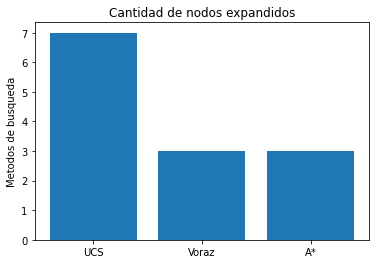

In [ ]:
# Solución propuesta
metodos=['UCS','Voraz','A*']
nodos=[7,3,3]
fig, ax = plt.subplots()
ax.set_ylabel('Metodos de busqueda')
ax.set_title('Cantidad de nodos expandidos')
plt.bar(metodos, nodos)
plt.show()

# ***la teoria si es consistente con la practica:***
UCS expande mas nodos que Voraz y A* ya que es busqueda NO informada, por lo que se expande hacia todos los lados, es decir, este no tiene un indicio por donde buscar.

En cuanto a Voraz y A*, la teoria dice que Voraz NO puede expandir mas nodos que el otro metodo ya que Voraz solo se guia por la heuristica, la diferencia es en el costo, ya que voraz no se guia por el costo.

Aca da la casualidad que A* y Voraz expanden los mismo nodos y tienen el mismo costo pero no la supera al valor obtenido por A*.